# Logistic regression model analysis: training time & AUC score

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Read results of multiple logistic regression models training

In [2]:
results = './logreg.csv'
df = pd.read_csv(results)
df

,Nb_training_samples,Training_time,AUC_cross_validation
0,10000,0.27,0.7450
1,20000,0.37,0.7440
2,50000,0.57,0.7395
3,100000,1.08,0.7393
4,200000,1.88,0.7396
5,500000,6.21,0.7416
6,1000000,12.36,0.7423
7,2000000,25.56,0.7424
8,5000000,73.18,0.7426
9,10000000,149.20,0.7430


## Fit a simple linear regression model for training time = f(number of training samples)

In [6]:
linreg = LinearRegression()
x = df.Nb_training_samples.values.reshape(-1, 1)
y = df.Training_time
linreg.fit(x, y)
time_linreg = linreg.predict(x)

## Plot the training time, a linear regression of training time, and AUC score

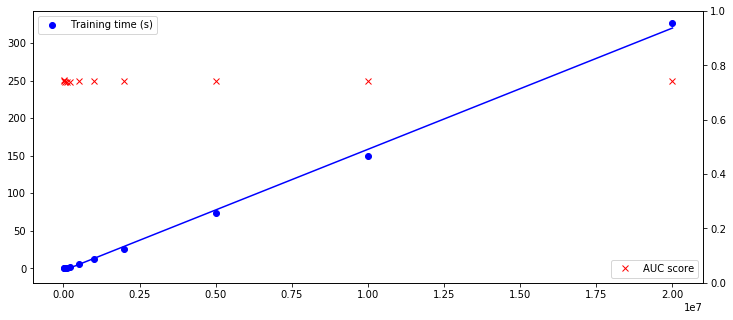

In [7]:
fig, ax1 = plt.subplots(figsize=(12,5))
# Axis 1 = training time in seconds
ax1.plot(df.Nb_training_samples, df.Training_time, 'bo')
ax1.plot(df.Nb_training_samples, time_linreg, 'b-')
ax1.legend(['Training time (s)'])
# Axis 2 = cross validation AUC score
ax2 = ax1.twinx()
ax2.plot(df.Nb_training_samples, df.AUC_cross_validation, 'rx', label='AUC score')
ax2.set_ylim(0,1)
ax2.legend(['AUC score'], loc=4)

* We can see that the training time of the logistic regression model (using sag solver) is linear in number of training samples. It should therefore be easy to predict how long the model training would take.

* However, calibrating on the full training set might not be useful, since we can see from the AUC scores results that increasing the training set size does not result in significant gains in the AUC score.

## How much time would it take to train the logistic model on the full dataset (168m examples)?

In [8]:
time_168m = linreg.predict(168e6)[0]
print("Training time for 168m examples: {:.0f}min".format(time_168m / 60))

Training time for 168m examples: 45min
